# Foundations of Geometric Methods in Data Analysis Search algorithms in metric trees

## Côme Clément
## Florez de la Colina Inès

In [1]:
import numpy as np
import random
from scipy.spatial.distance import euclidean
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm


from metric_forest import MetricForest
from metric_tree import MetricTree
from search_alg_visited_nodes import defeatist_search_vn, search_pruning_vn, search_defeatist_in_forest_vn, search_pruning_in_forest_vn, exact_nn_search
from metric_tree_pivot import MetricTreepivot
from comparing_visited_nodes import comparing_visited_nodes, increasing_dimension, plotting_vn_size, plotting_vn_dim
from experiments import *

# Question 1

Testing the accuracy of both search methods for random drawn data

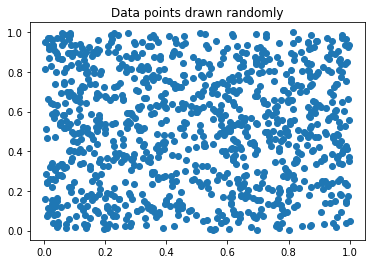

In [13]:
np.random.seed(42)
points = np.random.rand(1000, 2)
plt.scatter(points[:,0], points[:,1])
plt.title('Data points drawn randomly')
plt.show()
full_tree = MetricTree(points)

In [14]:
correct = 0
n_try = 10000
pbar = tqdm(range(n_try), desc="Test pruning search")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = search_pruning_vn(full_tree, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)})
print(f'Precision for the pruning search: {correct/n_try}')


Precision for the pruning search: 1.0


In [16]:
correct = 0
n_try = 10000
pbar = tqdm(range(n_try), desc="Test defeatist search")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = defeatist_search_vn(full_tree, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)})
print(f'Precision for the defeatist search: {correct/n_try}') 


Precision for the defeatist search: 0.5888


# Question 2

Testing the accuracy of both search methods for random drawn data

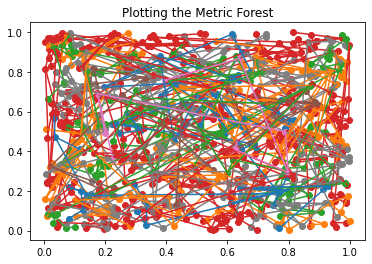

In [17]:
forest = MetricForest(0.5, points)
forest.plot(points)

In [19]:
correct = 0
n_try = 10000
pbar = tqdm(range(n_try), desc="Test pruning search forest")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = search_pruning_in_forest_vn(forest, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)}) 
print(f'Precision for the pruning search: {correct/n_try}')


Precision for the pruning search: 1.0


In [22]:
correct = 0
n_try = 10000
pbar = tqdm(range(n_try), desc="Test defeatist search forest")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = search_defeatist_in_forest_vn(forest, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)}) 
print(f'Precision for the defeatist search: {correct/n_try}') 


Precision for the defeatist search: 0.8398


# Question 3

# Varying the Dimension of the Ambient Space

## Random points in Euclidean Spaces of dimensions 2, 3, ... N

### Dimension 2

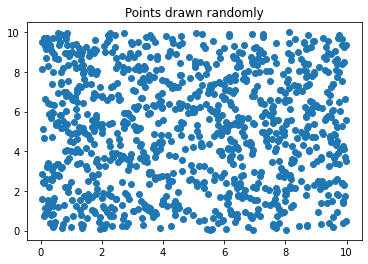

In [23]:
n_points, dim, n = 1000, 2, 10
np.random.seed(42)
points = select_random_points(n_points, dim, n)

There are 14 trees in this forest


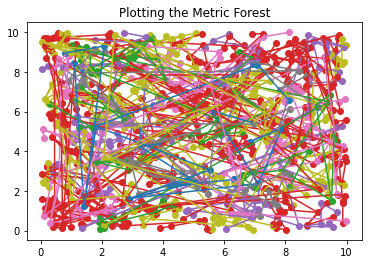

In [32]:
forest = MetricForest(0.5, points)
forest.plot(points)
print(f'There are {len(forest.forest)} trees in this forest')

In [33]:
query = np.random.rand(2)

In [34]:
print(applying_both_searches(forest, query))

Exact search with pruning: NN [0.4209319  0.17873935], min_dist 0.2154618848661943, visited_nodes: 212
Defeatist search : NN [0.4209319  0.17873935], min_dist 0.2154618848661943, visited_nodes: 65


### Dimension 3

In [35]:
query = np.random.rand(3)

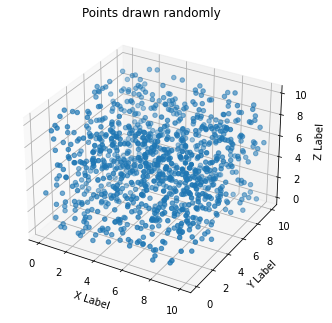

In [40]:
n_points, dim, n = 1000, 3, 10
np.random.seed(42)
points = select_random_points(n_points, dim, n)

There are 14 trees in this forest


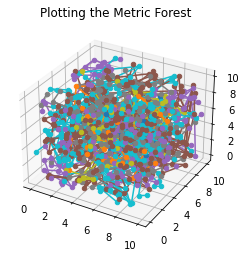

In [41]:
forest = MetricForest(0.5, points)
forest.plot(points)
print(f'There are {len(forest.forest)} trees in this forest')

In [42]:
print(applying_both_searches(forest, query))

Exact search with pruning: NN [1.16072641 0.46002642 0.40728802], min_dist 0.6417265786642941, visited_nodes: 323
Defeatist search : NN [1.16072641 0.46002642 0.40728802], min_dist 0.6417265786642941, visited_nodes: 62


### Dimnesion N

In [43]:
N = 10
points = select_random_points(n_points, N, n)

In [44]:
query = n*np.random.rand(N)
forest = MetricForest(0.5, points)

In [45]:
print(applying_both_searches(forest, query))

Exact search with pruning: NN [3.05432766 7.81256954 3.65919435 2.41602462 6.72200664 1.96758778
 8.9565292  1.05598396 7.06549802 4.99548701], min_dist 4.504337560026525, visited_nodes: 901
Defeatist search : NN [3.05432766 7.81256954 3.65919435 2.41602462 6.72200664 1.96758778
 8.9565292  1.05598396 7.06549802 4.99548701], min_dist 4.504337560026525, visited_nodes: 78


### Visited Nodes according to the variation of the dimension

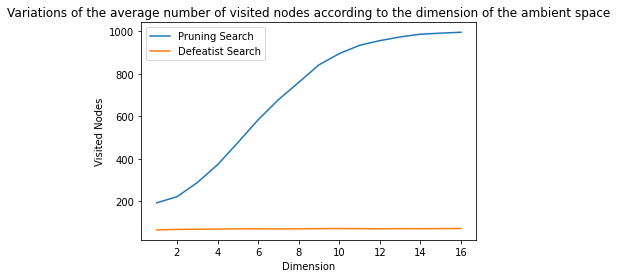

In [2]:
n_points, avg, max_dim, n, m = 1000, 100, 16, 10, 0.5
average_nodes_visited_dim(n_points, avg, max_dim, n, m)

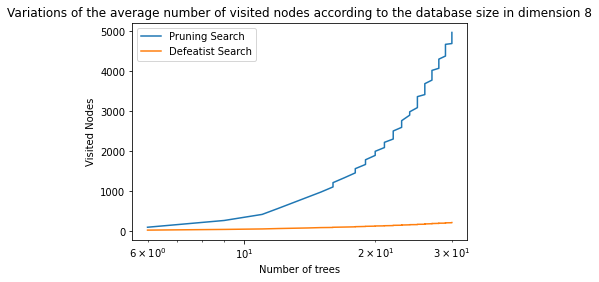

In [2]:
avg, max_num_points, n, m, d = 100, 10000, 10, 0.5, 8
average_nodes_visited_size(avg, max_num_points, n, m, d)

## Random points drawn from a mixture of Gaussians

### Dimension 2

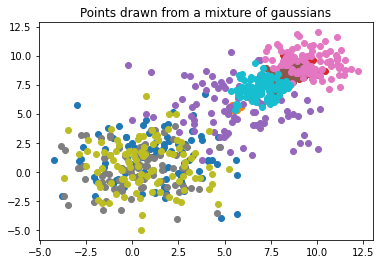

In [18]:
n_points, dim, n, num_points_gaussian = 1000, 2, 10, 100
points = data_drawn_from_gaussians(n_points, dim, n, num_points_gaussian)
plotting_gaussians(points, dim, n, num_points_gaussian)

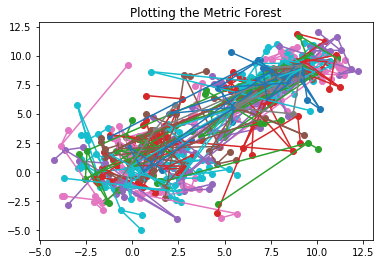

In [20]:
forest = MetricForest(0.5, points)
forest.plot(points)

In [21]:
query = np.random.rand(2)

In [22]:
print(applying_both_searches(forest, query))

Exact search with pruning: NN [0.78087316 0.53163762], min_dist 0.1734173801542548, visited_nodes: 217
Defeatist search : NN [0.78087316 0.53163762], min_dist 0.1734173801542548, visited_nodes: 71


### Dimension 3

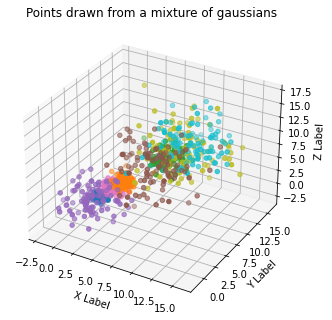

In [2]:
n_points, dim, n, num_points_gaussian = 1000, 3, 10, 100
points = data_drawn_from_gaussians(n_points, dim, n, num_points_gaussian)
plotting_gaussians(points, dim, n, num_points_gaussian)

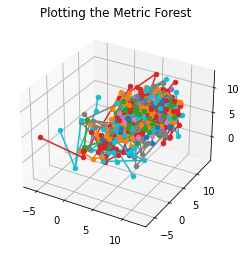

In [24]:
forest = MetricForest(0.5, points)
forest.plot(points)

In [25]:
query = np.random.rand(3)

In [26]:
print(applying_both_searches(forest, query))

Exact search with pruning: NN [ 0.64739848 -0.0815616  -0.816755  ], min_dist 1.1259462232303865, visited_nodes: 331
Defeatist search : NN [ 0.64739848 -0.0815616  -0.816755  ], min_dist 1.1259462232303865, visited_nodes: 61


### Visited Nodes according to the variations of the dimension

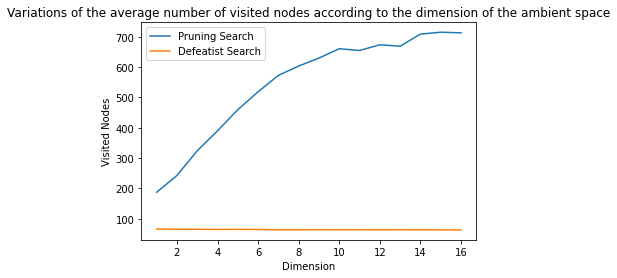

In [3]:
n_points, avg, max_dim, n, m = 1000, 100, 16, 10, 0.5
average_nodes_visited_dim(n_points, avg, max_dim, n, m, isgaussian=True)

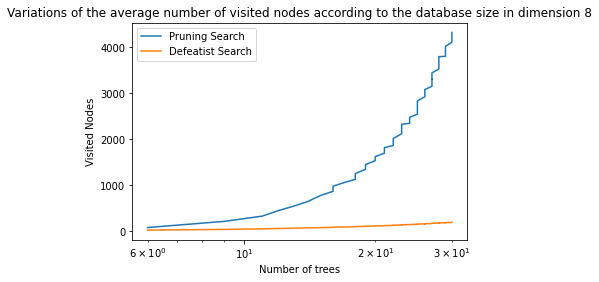

In [4]:
avg, max_num_points, n, m, d = 100, 10000, 10, 0.5, 8
average_nodes_visited_size(avg, max_num_points, n, m, d, isgaussian=True)

# Varying the dimension of the Ambient Space while keeping the intrinsic dimension constant

In [36]:
# intrinsic dimension d
# dimension of the ambient space D

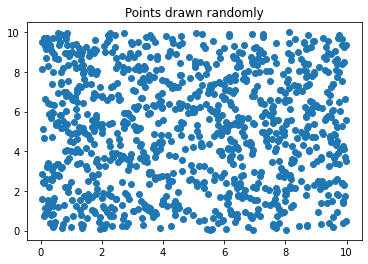

In [5]:
n_points, dim, n = 1000, 2, 10
np.random.seed(42)
points = select_random_points(n_points, dim, n)

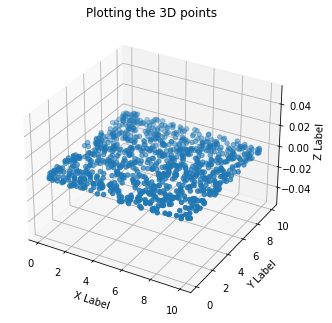

In [6]:
d, D = points.shape[1], 3
new_points = transforming_the_data_from_d_to_D(points, d, D)
plotting3D(new_points)

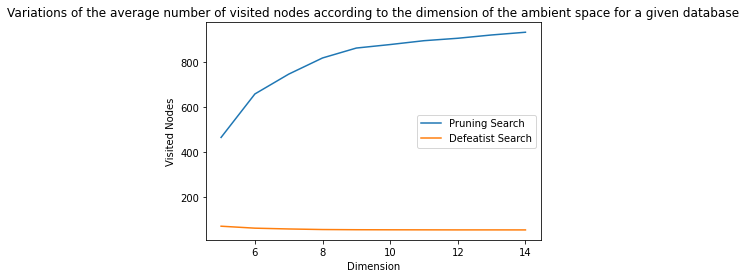

In [2]:
n_points, dim, num_D, n, avg = 1000, 5, 10, 10, 100
average_nodes_visited_intrinsic_dim(n_points, dim, num_D, n, avg)

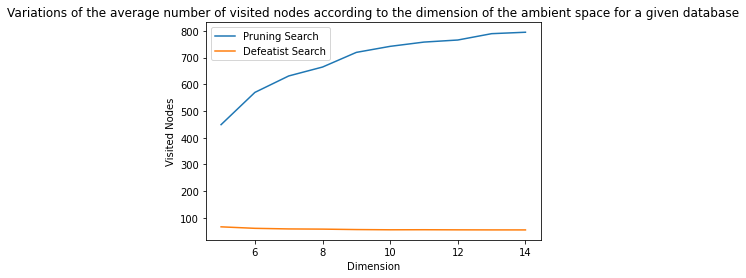

In [3]:
n_points, dim, num_D, n, avg = 1000, 5, 10, 10, 100
average_nodes_visited_intrinsic_dim(n_points, dim, num_D, n, avg, isgaussian=True)

# Question 4

# Question 5

## Random points in 2D and ND

### Comparing the dataset size


None


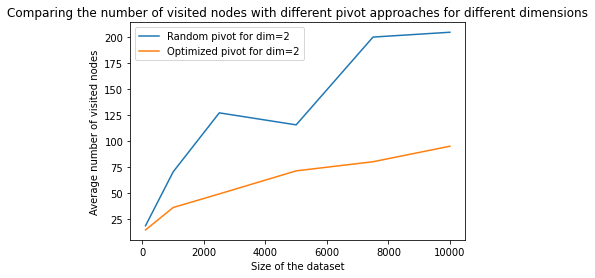

In [5]:
data_size = [100, 1000, 2500, 5000, 7500, 10000]
N = 2
mean_vns, mean_vns_bis, N = comparing_visited_nodes(data_size, N)
print(plotting_vn_size(mean_vns, mean_vns_bis, N, data_size))


None


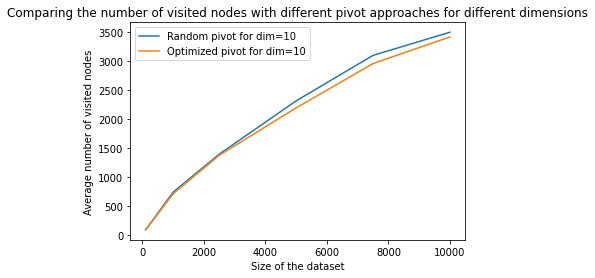

In [15]:
data_size = [100, 1000, 2500, 5000, 7500, 10000]
N = 10
mean_vns, mean_vns_bis, N = comparing_visited_nodes(data_size, N)
print(plotting_vn_size(mean_vns, mean_vns_bis, N, data_size))

### Comparing the dimension

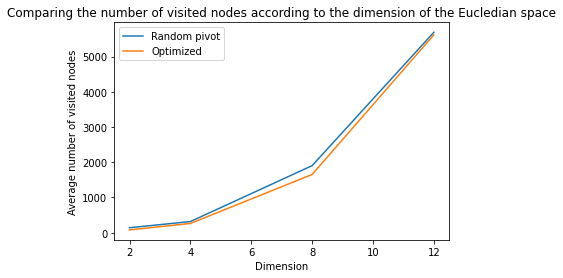

In [40]:
dims = [2, 4, 8, 12]
mean_vns, mean_vns_bis = increasing_dimension(dims, gaussian=False, size=10000)
print(plotting_vn_dim(mean_vns, mean_vns_bis, dims))

In [41]:
print(mean_vns)
print(mean_vns_bis)

[141.045, 316.645, 1903.696, 5690.539]
[79.135, 262.474, 1652.595, 5617.341]


## Gaussian points in 2D and ND

### Comparing the dataset size


None


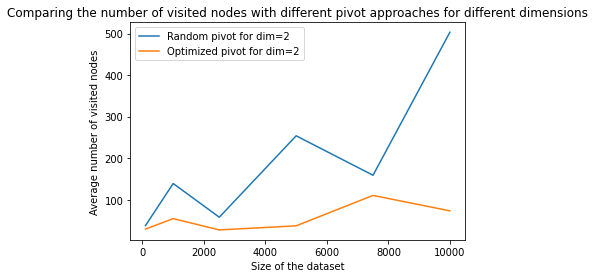

In [8]:
data_size = [100, 1000, 2500, 5000, 7500, 10000]
N = 2
mean_vns, mean_vns_bis, N = comparing_visited_nodes(data_size, N, gaussian=True)
print(plotting_vn_size(mean_vns, mean_vns_bis, N, data_size))


None


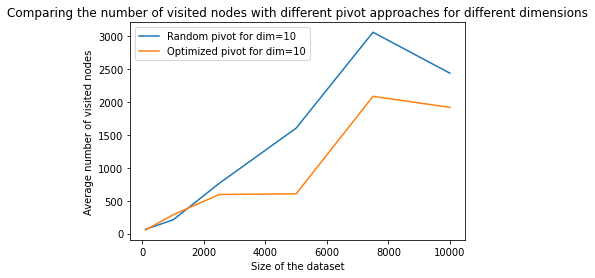

In [26]:
data_size = [100, 1000, 2500, 5000, 7500, 10000]
N = 10
mean_vns, mean_vns_bis, N = comparing_visited_nodes(data_size, N, gaussian=True)
print(plotting_vn_size(mean_vns, mean_vns_bis, N, data_size))

### Comparison of the dimension

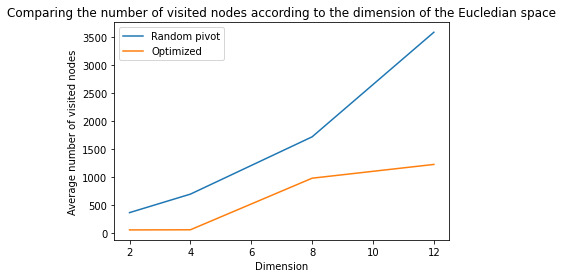

In [11]:
dims = [2, 4, 8, 12]
mean_vns, mean_vns_bis = increasing_dimension(dims, gaussian=True)
plotting_vn_dim(mean_vns, mean_vns_bis, dims)